In [314]:
import pandas as pd
import sqlite3
import csv
df = pd.read_csv('Drugs.csv')
display(df)

,PatientID,DrugID,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,1,DrugID_1,23,F,HIGH,HIGH,25.355,DrugY
1,2,DrugID_2,47,M,LOW,HIGH,13.093,drugC
2,3,DrugID_2,47,M,LOW,HIGH,10.114,drugC
3,4,DrugID_3,28,F,NORMAL,HIGH,7.798,drugX
4,5,DrugID_1,61,F,LOW,HIGH,18.043,DrugY
...,...,...,...,...,...,...,...,...
195,196,DrugID_2,56,F,LOW,HIGH,11.567,drugC
196,197,DrugID_2,16,M,LOW,HIGH,12.006,drugC
197,198,DrugID_3,52,M,NORMAL,HIGH,9.894,drugX
198,199,DrugID_3,23,M,NORMAL,NORMAL,14.020,drugX


In [315]:
conn = sqlite3.connect('Drugs.db')
conn_norm = create_connection('python.db', True)

In [316]:

cur = conn.cursor()
cur.execute('''DROP TABLE IF EXISTS Drugs''')
df.to_sql('Drugs', conn, if_exists='replace', index=False) # - writes the pd.df to SQLIte DB
conn.commit()

In [317]:
pd.read_sql('select * from Drugs', conn)

,PatientID,DrugID,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,1,DrugID_1,23,F,HIGH,HIGH,25.355,DrugY
1,2,DrugID_2,47,M,LOW,HIGH,13.093,drugC
2,3,DrugID_2,47,M,LOW,HIGH,10.114,drugC
3,4,DrugID_3,28,F,NORMAL,HIGH,7.798,drugX
4,5,DrugID_1,61,F,LOW,HIGH,18.043,DrugY
...,...,...,...,...,...,...,...,...
195,196,DrugID_2,56,F,LOW,HIGH,11.567,drugC
196,197,DrugID_2,16,M,LOW,HIGH,12.006,drugC
197,198,DrugID_3,52,M,NORMAL,HIGH,9.894,drugX
198,199,DrugID_3,23,M,NORMAL,NORMAL,14.020,drugX


In [318]:
import pandas as pd
import sqlite3
from sqlite3 import Error

def create_connection(db_file, delete_db=False):
    import os
    if delete_db and os.path.exists(db_file):
        os.remove(db_file)

    conn = None
    try:
        conn = sqlite3.connect(db_file)
        conn.execute("PRAGMA foreign_keys = 1")
    except Error as e:
        print(e)

    return conn


def create_table(conn, create_table_sql):
    try:
        c = conn.cursor()
        c.execute(create_table_sql)
    except Error as e:
        print(e)
        
def execute_sql_statement(sql_statement, conn):
    cur = conn.cursor()
    cur.execute(sql_statement)

    rows = cur.fetchall()

    return rows

In [319]:
sql_statement = "SELECT DISTINCT drug from Drugs ORDER BY drug"

drug_type = execute_sql_statement(sql_statement, conn)
drug_type = [row[0] for row in drug_type]
print(drug_type)

['DrugY', 'drugA', 'drugB', 'drugC', 'drugX']


In [320]:

create_table_sql = """CREATE TABLE [Drug_type] (
    [Drug_type] Varchar NOT NULL PRIMARY KEY
);
"""
# conn_norm.close()


create_table(conn_norm, create_table_sql)
sql_statement = "SELECT * FROM Drug_type"
df = pd.read_sql_query(sql_statement, conn_norm)
display(df)


,Drug_type


In [321]:
def insert_drugtype(conn, values):
    sql = ''' INSERT INTO Drug_type(Drug_type)
              VALUES(?) '''
    cur = conn.cursor()
    cur.execute(sql, values)
    return cur.lastrowid

with conn_norm:
    for drug in drug_type:
        insert_drugtype(conn_norm, (drug, ))

In [322]:

sql_statement = "SELECT * FROM Drug_type"
df = pd.read_sql_query(sql_statement, conn_norm)
display(df)


,Drug_type
0,DrugY
1,drugA
2,drugB
3,drugC
4,drugX


In [323]:
create_table_sql = """CREATE TABLE [Sex] (
    [Sex] Varchar NOT NULL PRIMARY KEY
);
"""
# conn_norm.close()


create_table(conn_norm, create_table_sql)
sql_statement = "SELECT * FROM Sex"
df = pd.read_sql_query(sql_statement, conn_norm)
display(df)

,Sex


In [324]:
sql_statement = "SELECT DISTINCT Sex from Drugs ORDER BY Sex"
sex = execute_sql_statement(sql_statement, conn)

In [325]:
def insert_Sex(conn, values):
    sql = ''' INSERT INTO Sex(Sex)
              VALUES(?) '''
    cur = conn.cursor()
    cur.execute(sql, values)
    return cur.lastrowid

with conn_norm:
    for s in sex:
        insert_Sex(conn_norm, s)

In [326]:
sql_statement = "SELECT * FROM Sex"
df = pd.read_sql_query(sql_statement, conn_norm)
display(df)

,Sex
0,F
1,M


In [327]:
create_table_sql = """CREATE TABLE [BP] (
    [BP] Varchar NOT NULL PRIMARY KEY
);
"""
# conn_norm.close()


create_table(conn_norm, create_table_sql)
sql_statement = "SELECT * FROM BP"
df = pd.read_sql_query(sql_statement, conn_norm)
display(df)

,BP


In [328]:
sql_statement = "SELECT DISTINCT BP from Drugs ORDER BY BP"
BP = execute_sql_statement(sql_statement, conn)

In [329]:
def insert_BP(conn, values):
    sql = ''' INSERT INTO BP(BP)
              VALUES(?) '''
    cur = conn.cursor()
    cur.execute(sql, values)
    return cur.lastrowid

with conn_norm:
    for bp in BP:
        insert_BP(conn_norm, bp )

In [330]:
sql_statement = "SELECT * FROM BP"
df = pd.read_sql_query(sql_statement, conn_norm)
display(df)


,BP
0,HIGH
1,LOW
2,NORMAL


In [331]:
create_table_sql = """CREATE TABLE [Cholesterol] (
    [Cholesterol] Varchar NOT NULL PRIMARY KEY
);
"""
# conn_norm.close()


create_table(conn_norm, create_table_sql)
sql_statement = "SELECT * FROM Cholesterol"
df = pd.read_sql_query(sql_statement, conn_norm)
display(df)

,Cholesterol


In [332]:
sql_statement = "SELECT DISTINCT Cholesterol from Drugs ORDER BY Cholesterol"
CH = execute_sql_statement(sql_statement, conn)

In [333]:
def insert_ch(conn, values):
    sql = ''' INSERT INTO Cholesterol(Cholesterol)
              VALUES(?) '''
    cur = conn.cursor()
    cur.execute(sql, values)
    return cur.lastrowid

with conn_norm:
    for c in CH:
        insert_ch(conn_norm, c )

In [334]:
sql_statement = "SELECT * FROM Cholesterol"
df = pd.read_sql_query(sql_statement, conn_norm)
display(df)

,Cholesterol
0,HIGH
1,NORMAL


In [335]:

create_table_sql = """
CREATE TABLE IF NOT EXISTS DrugT (
    DrugID Varchar NOT NULL PRIMARY KEY,
    DrugType Varchar,
    FOREIGN KEY (DrugType) REFERENCES Drug_Type(Drug_type)
);
"""

create_table(conn_norm, create_table_sql)
sql_statement = "SELECT * FROM DrugT"
df = pd.read_sql_query(sql_statement, conn_norm)
display(df)


,DrugID,DrugType


In [336]:

sql_statement = "SELECT DISTINCT DrugID, drug FROM Drugs ORDER BY DrugID"
drugs = execute_sql_statement(sql_statement, conn)



In [337]:

def insert_drug(conn, values):
    sql = ''' INSERT INTO DrugT(DrugID, DrugType)
              VALUES(?, ?) '''
    cur = conn.cursor()
    cur.execute(sql, values)
    conn.commit()
    return cur.lastrowid


with conn_norm:
    for ID, drug in drugs:
        insert_drug(conn_norm, (ID, drug))



In [338]:

sql_statement = "SELECT * FROM DrugT"
df = pd.read_sql_query(sql_statement, conn_norm)
display(df)


,DrugID,DrugType
0,DrugID_1,DrugY
1,DrugID_2,drugC
2,DrugID_3,drugX
3,DrugID_4,drugA
4,DrugID_5,drugB


In [339]:
create_table_sql = """
CREATE TABLE IF NOT EXISTS Patient (
    PatientID Varchar, DrugID varchar,
    Age Integer,Sex varchar, BP_level varchar,Cholesterol_level varchar, Na_to_K Real,
    FOREIGN KEY (DrugID) REFERENCES DrugT(DrugID)
    FOREIGN KEY (Sex) REFERENCES Sex(Sex)
    FOREIGN KEY (Bp_level) REFERENCES BP(BP)
    FOREIGN KEY (Cholesterol_level) REFERENCES Cholesterol(Cholesterol)
);
"""

create_table(conn_norm, create_table_sql)
sql_statement = "SELECT * FROM Patient"
df = pd.read_sql_query(sql_statement, conn_norm)
display(df)

,PatientID,DrugID,Age,Sex,BP_level,Cholesterol_level,Na_to_K


In [340]:
sql_statement = "SELECT DISTINCT drugs.PatientID,DrugID,Age,Sex,BP,Cholesterol,Na_to_K FROM Drugs Order by PatientID"
patient = execute_sql_statement(sql_statement, conn)

In [341]:
def insert_patient(conn, values):
    sql = ''' INSERT INTO Patient(PatientID,DrugID,Age,Sex,BP_level,Cholesterol_level,Na_to_K)
              VALUES(?, ?,?,?,?,?,?) '''
    cur = conn.cursor()
    cur.execute(sql, values)
    conn.commit()
    return cur.lastrowid


with conn_norm:
    for value in patient:
        insert_patient(conn_norm, value)

In [342]:
sql_statement = "SELECT * FROM Patient"
df = pd.read_sql_query(sql_statement, conn_norm)
display(df)


,PatientID,DrugID,Age,Sex,BP_level,Cholesterol_level,Na_to_K
0,1,DrugID_1,23,F,HIGH,HIGH,25.355
1,2,DrugID_2,47,M,LOW,HIGH,13.093
2,3,DrugID_2,47,M,LOW,HIGH,10.114
3,4,DrugID_3,28,F,NORMAL,HIGH,7.798
4,5,DrugID_1,61,F,LOW,HIGH,18.043
...,...,...,...,...,...,...,...
195,196,DrugID_2,56,F,LOW,HIGH,11.567
196,197,DrugID_2,16,M,LOW,HIGH,12.006
197,198,DrugID_3,52,M,NORMAL,HIGH,9.894
198,199,DrugID_3,23,M,NORMAL,NORMAL,14.020


In [343]:
sql_statement = "SELECT Patient.PatientID,Patient.Age,DrugT.DrugID,DrugT.DrugType,Sex.Sex,BP.BP,Cholesterol.Cholesterol,Patient.Na_to_K FROM Patient JOIN DrugT ON Patient.DrugID = DrugT.DrugID JOIN Sex ON Patient.Sex = Sex.Sex JOIN BP ON Patient.BP_level = BP.BP JOIN Cholesterol ON Patient.Cholesterol_level = Cholesterol.Cholesterol"
norm_df = pd.read_sql_query(sql_statement, conn_norm)
display(norm_df)

,PatientID,Age,DrugID,DrugType,Sex,BP,Cholesterol,Na_to_K
0,1,23,DrugID_1,DrugY,F,HIGH,HIGH,25.355
1,2,47,DrugID_2,drugC,M,LOW,HIGH,13.093
2,3,47,DrugID_2,drugC,M,LOW,HIGH,10.114
3,4,28,DrugID_3,drugX,F,NORMAL,HIGH,7.798
4,5,61,DrugID_1,DrugY,F,LOW,HIGH,18.043
...,...,...,...,...,...,...,...,...
195,196,56,DrugID_2,drugC,F,LOW,HIGH,11.567
196,197,16,DrugID_2,drugC,M,LOW,HIGH,12.006
197,198,52,DrugID_3,drugX,M,NORMAL,HIGH,9.894
198,199,23,DrugID_3,drugX,M,NORMAL,NORMAL,14.020


In [344]:
conn.commit()

In [ ]:
##Machine Learning

In [353]:
norm_df.head(10)

,PatientID,Age,DrugID,DrugType,Sex,BP,Cholesterol,Na_to_K
0,1,23,DrugID_1,DrugY,F,HIGH,HIGH,25.355
1,2,47,DrugID_2,drugC,M,LOW,HIGH,13.093
2,3,47,DrugID_2,drugC,M,LOW,HIGH,10.114
3,4,28,DrugID_3,drugX,F,NORMAL,HIGH,7.798
4,5,61,DrugID_1,DrugY,F,LOW,HIGH,18.043
5,6,22,DrugID_3,drugX,F,NORMAL,HIGH,8.607
6,7,49,DrugID_1,DrugY,F,NORMAL,HIGH,16.275
7,8,41,DrugID_2,drugC,M,LOW,HIGH,11.037
8,9,60,DrugID_1,DrugY,M,NORMAL,HIGH,15.171
9,10,43,DrugID_1,DrugY,M,LOW,NORMAL,19.368


In [ ]:
##EDA

In [346]:
import matplotlib.pyplot as plt
import seaborn as sns

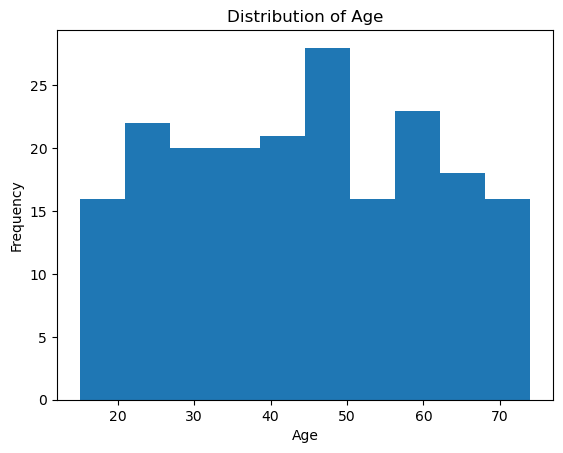

In [347]:
plt.hist(norm_df['Age'], bins=10)
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Distribution of Age')
plt.show()

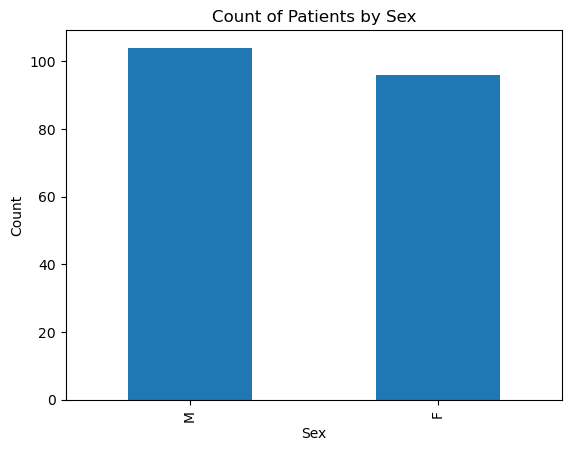

In [348]:
norm_df['Sex'].value_counts().plot(kind='bar')
plt.xlabel('Sex')
plt.ylabel('Count')
plt.title('Count of Patients by Sex')
plt.show()

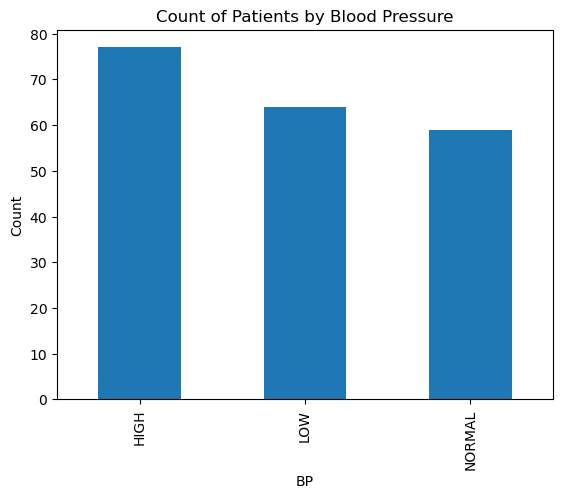

In [349]:
norm_df['BP'].value_counts().plot(kind='bar')
plt.xlabel('BP')
plt.ylabel('Count')
plt.title('Count of Patients by Blood Pressure')
plt.show()

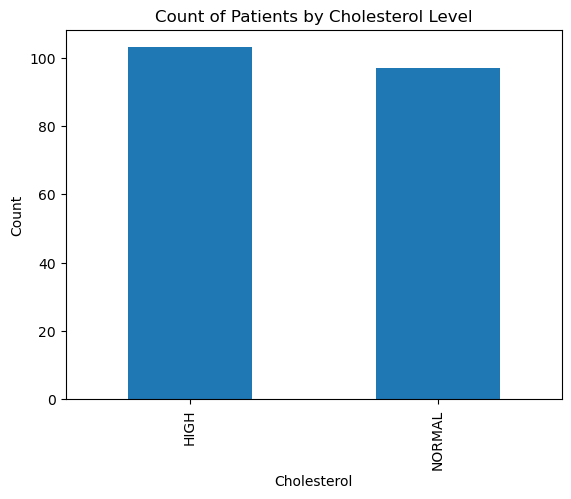

In [350]:
norm_df['Cholesterol'].value_counts().plot(kind='bar')
plt.xlabel('Cholesterol')
plt.ylabel('Count')
plt.title('Count of Patients by Cholesterol Level')
plt.show()

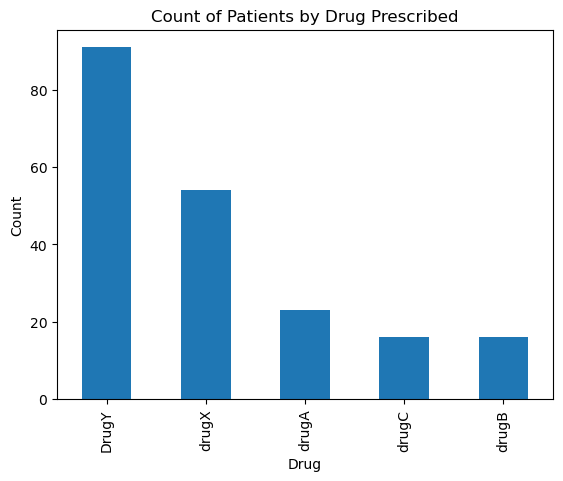

In [352]:
norm_df['DrugType'].value_counts().plot(kind='bar')
plt.xlabel('Drug')
plt.ylabel('Count')
plt.title('Count of Patients by Drug Prescribed')
plt.show()

In [ ]:
### Pre-processing the data - Encoding the categorical features

In [355]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
norm_df['Sex'] = label_encoder.fit_transform(norm_df['Sex'])
norm_df['DrugType'] = label_encoder.fit_transform(norm_df['DrugType'])
norm_df['BP'] = label_encoder.fit_transform(norm_df['BP'])
norm_df['Cholesterol'] = label_encoder.fit_transform(norm_df['Cholesterol'])

In [ ]:
###Train -Test -Split

In [357]:
x = norm_df[['Age','Sex','BP','Cholesterol','Na_to_K']]

In [358]:
x

,Age,Sex,BP,Cholesterol,Na_to_K
0,23,0,0,0,25.355
1,47,1,1,0,13.093
2,47,1,1,0,10.114
3,28,0,2,0,7.798
4,61,0,1,0,18.043
...,...,...,...,...,...
195,56,0,1,0,11.567
196,16,1,1,0,12.006
197,52,1,2,0,9.894
198,23,1,2,1,14.020


In [361]:
y = norm_df['DrugType']

In [362]:
y.head()

0    0
1    3
2    3
3    4
4    0
Name: DrugType, dtype: int32

In [363]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1)

In [ ]:
###Model Fitting - SVM

In [364]:
from sklearn.svm import SVC

model = SVC(kernel='linear')
model.fit(x_train, y_train)

accuracy = model.score(x_test, y_test)
print(f"Accuracy of the SVM model: {accuracy}")

Accuracy of the SVM model: 0.9833333333333333


In [ ]:
###Testing

In [365]:
y_pred = model.predict(x_test)
y_pred

array([4, 0, 4, 3, 0, 4, 4, 0, 0, 0, 4, 3, 0, 0, 1, 1, 4, 4, 2, 0, 4, 4,
       4, 0, 2, 4, 4, 0, 3, 4, 3, 0, 0, 0, 1, 0, 1, 0, 0, 0, 2, 0, 0, 4,
       2, 0, 4, 4, 0, 2, 0, 0, 0, 0, 0, 0, 4, 4, 4, 1])

In [366]:
x_test.head()

,Age,Sex,BP,Cholesterol,Na_to_K
58,60,1,2,1,10.091
40,73,0,2,0,19.221
34,53,1,2,0,14.133
102,28,0,1,0,13.127
184,18,0,0,0,37.188


In [367]:
model.predict([[73, 0, 2, 0, 19.221]])

C:\Users\dlali\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


array([0])

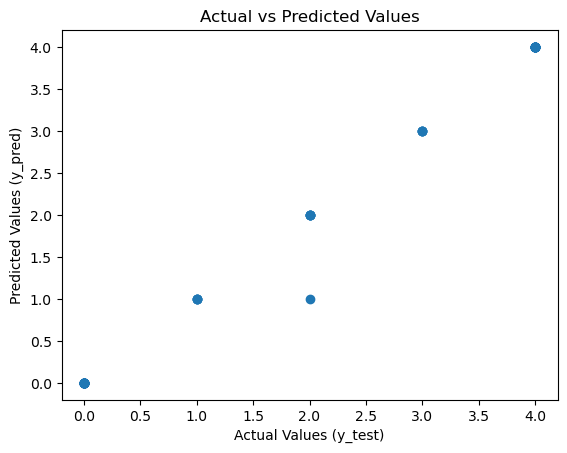

In [368]:
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Values (y_test)')
plt.ylabel('Predicted Values (y_pred)')
plt.title('Actual vs Predicted Values')
plt.show()